# Popular Data Science Questions

In this project we want to use Data Science Stack Exchange to find what content a data science company should create, based on interest by subject. The website has a public database from which we can retrieve data to answer or questions. Let's get information on the tags of the posts.

We get the data we need from the website using the following SQL code:

SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;

### Exploring the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

questions = pd.read_csv("2019_questions.csv", parse_dates=['CreationDate'])

questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [2]:
print(questions.isnull().sum(),'\n')
print(questions.shape, '\n')
print(questions.info(),'\n')

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64 

(8839, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB
None 



### Cleaning the data

We see that FavoriteCount is the only column with missing values. Let's fill in the NaN with zeroes since most likely the user didn't put an answer.

In [3]:
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)

In [4]:
questions.head(1)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0


In [5]:
ser = questions['Tags'].apply(lambda elem : type(elem))
print(ser.unique())

[<class 'str'>]


We see that the types in Tags are all strings, so we can convert that column to string and replace the <> symbols with commas, to have a list of tags for each row.

In [6]:
questions['Tags'] = questions['Tags'].str.replace("^<|>$", "").str.split("><")
questions.head(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0


### Data analysis

First we count how many times each tag was used.

In [7]:
tag_count = {}

for i in questions['Tags'] : 
    for j in i :
        if j not in tag_count : tag_count[j] = 1
        else : tag_count[j] += 1

#Let's check the first 10 values. It seems to be correct.

first10 = {l: tag_count[l] for l in list(tag_count)[:10]}
print(first10)

{'machine-learning': 2693, 'data-mining': 217, 'regression': 347, 'linear-regression': 175, 'regularization': 50, 'python': 1814, 'time-series': 466, 'forecast': 34, 'forecasting': 85, 'scikit-learn': 540}


In [8]:
#Let's turn the dictionnary into a dataframe

tag_df = pd.DataFrame.from_dict(tag_count, orient='index')
tag_df.rename(columns = {0 : 'Count'}, inplace = True)
print(tag_df.shape)
tag_df = tag_df.sort_values('Count', ascending = False)
tag_df.head(20)

(526, 1)


,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


Let's visualize the data of tag counts.

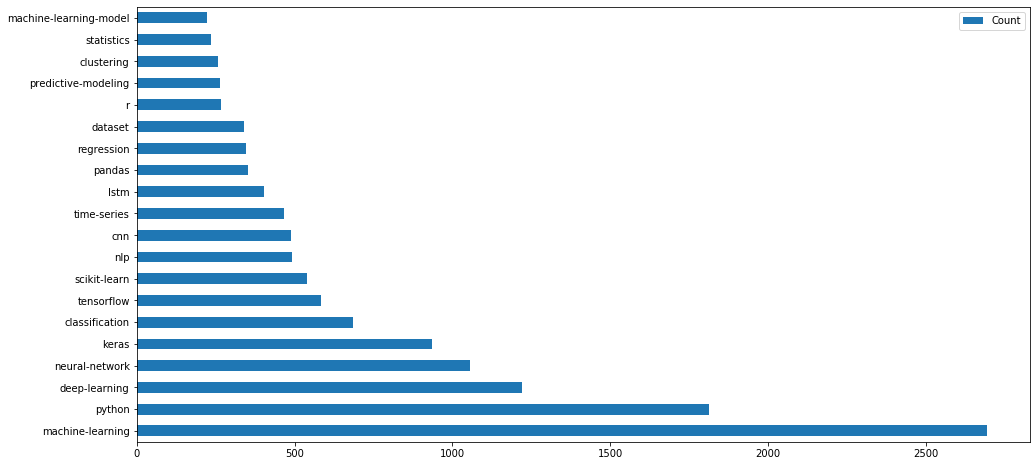

In [9]:
tag_df.head(20).plot(kind = 'barh', figsize=(16,8))

Then we count how many times each tag was viewed.

In [10]:
tag_views = {}

for index, row in questions.iterrows():
    for elem in row['Tags'] :
        if elem not in tag_views : tag_views[elem] = row['ViewCount']
        else : tag_views[elem] += row['ViewCount']
          
        
#Let's check the first 10 values. It seems to be correct.

first20 = {l: tag_views[l] for l in list(tag_views)[:20]}
print(first20)
    

{'machine-learning': 388499, 'data-mining': 31056, 'regression': 49451, 'linear-regression': 18978, 'regularization': 4941, 'python': 537585, 'time-series': 64134, 'forecast': 8153, 'forecasting': 8797, 'scikit-learn': 128110, 'pca': 6387, 'dataset': 43151, 'bigdata': 12918, 'data': 17888, 'speech-to-text': 281, 'fuzzy-logic': 1264, 'anomaly-detection': 10992, 'online-learning': 1485, 'matrix-factorisation': 906, 'correlation': 9403}


In [11]:
#Let's turn the dictionnary into a dataframe

tag_views_df = pd.DataFrame.from_dict(tag_views, orient='index')
tag_views_df.rename(columns = {0 : 'Views'}, inplace = True)
print(tag_views_df.shape)
tag_views_df = tag_views_df.sort_values('Views', ascending = False)
tag_views_df.head(20)

(526, 1)


,Views
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


Let's visualize the data of tag views.

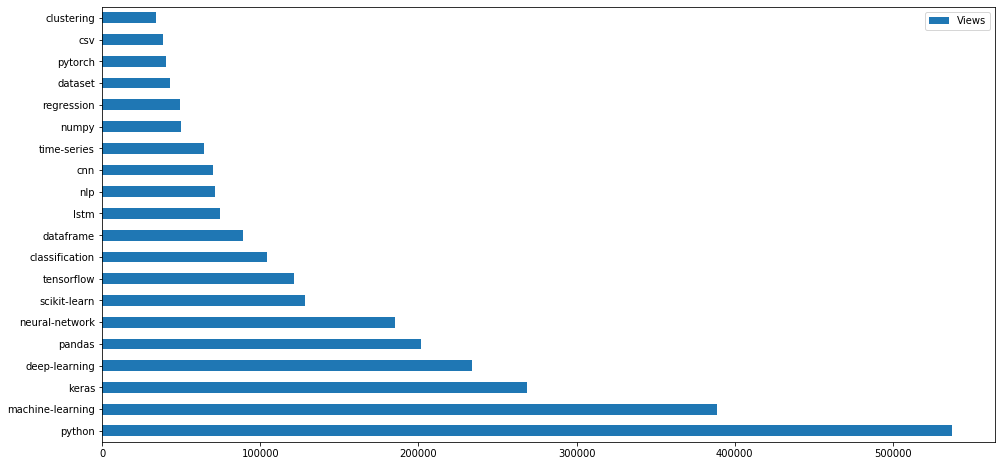

In [12]:
tag_views_df.head(20).plot(kind = 'barh', figsize = (16,8))

Let's now look at both graphs side by side.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20e2c610>],
      dtype=object)

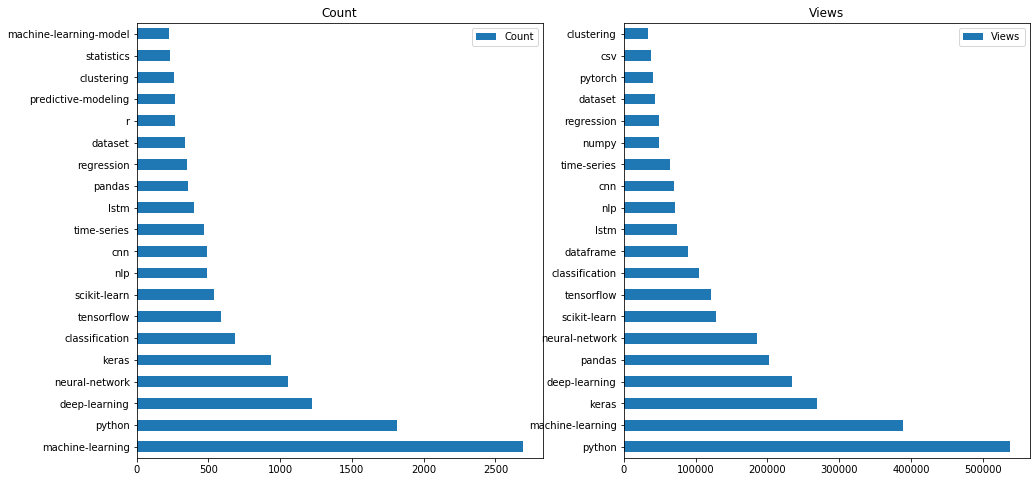

In [13]:
fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

tag_df.head(20).plot(kind = 'barh', ax = ax1, subplots = True)
tag_views_df.head(20).plot(kind = 'barh', ax = ax2, subplots = True)

### Relations between tags

We now want to see if there are any relations between tags. How many times do 2 tags appear together?

In [14]:
#We create a list of tags
all_tags = list(tag_df.index)

#We create DataFrame matrix of all tags as columns and all tags as indexes.
associations = pd.DataFrame(index = all_tags, columns = all_tags)
associations = associations.fillna(0)
associations.head()


,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,...,marginal-effects,hurdle-model,least-squares-svm,proximal-svm,xboost,cs231n,statsmodels,rdkit,apache-nifi,kitti-dataset
machine-learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
python,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deep-learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neural-network,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keras,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#We fill associations DF with the number of pairs. 
#Since this table is big, I tested a sample of the first 5 tags before doing all.

for elem in questions['Tags'] :
    associations.loc[elem, elem] += 1
    
associations

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,...,marginal-effects,hurdle-model,least-squares-svm,proximal-svm,xboost,cs231n,statsmodels,rdkit,apache-nifi,kitti-dataset
machine-learning,2693,499,429,366,195,259,106,188,113,124,...,0,0,0,0,1,0,0,0,0,0
python,499,1814,160,137,280,98,167,235,71,62,...,0,0,0,0,0,0,1,0,0,0
deep-learning,429,160,1220,305,247,59,136,16,72,160,...,0,0,0,0,0,1,0,0,0,1
neural-network,366,137,305,1055,235,65,108,24,24,118,...,0,0,0,0,0,0,0,1,0,0
keras,195,280,247,235,935,58,256,34,23,116,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cs231n,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
statsmodels,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
rdkit,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
apache-nifi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
#Let's do this only for top 20 most viewed tags.
toptags = list(tag_df.head(20).index)

relations_most_used = associations.loc[tag_df.head(20).index, tag_df.head(20).index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


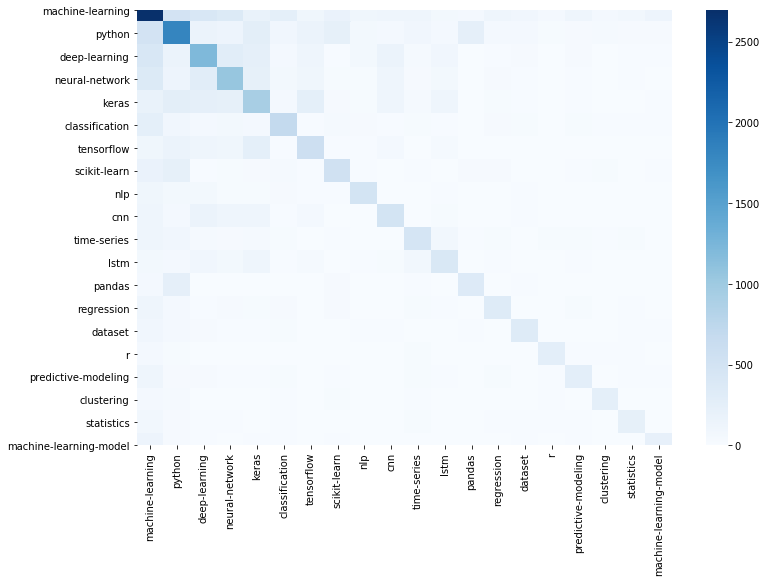

In [17]:
#Let's now create a heatmap

plt.figure(figsize = (12, 8))
sns.heatmap(relations_most_used, cmap = "Blues", annot=False)

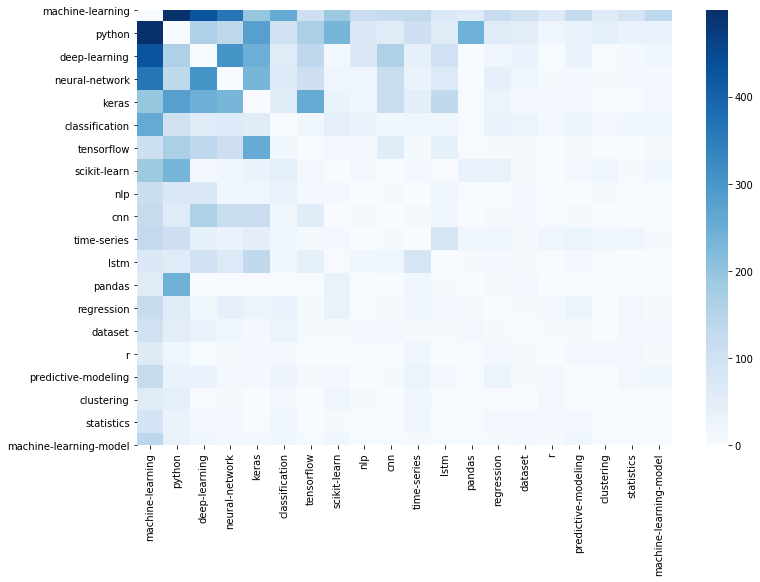

In [18]:
#We need to put the values in the middle to zero in order not to false the coloring.
#Let's recreate it 

for i in range(relations_most_used.shape[0]) :
    relations_most_used.iloc[i,i] = 0

plt.figure(figsize = (12, 8))
sns.heatmap(relations_most_used, cmap = "Blues", annot=False)

What sticks out is the correlation between pandas and python. Also tensorflow and keras.

### Answering questions about deep learning

In [19]:
all_q = pd.read_csv("all_questions.csv", parse_dates = ['CreationDate'])

all_q.head(2)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>


In [20]:
#We transform the Tags columns as we did previously.

all_q['Tags'] = all_q['Tags'].str.replace("^<|>$", "").str.split("><")
all_q.head(2)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]


We will consider these tags as related to deep learning :
["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

Let's create a column that contains 1 if the tag is a deep learning related tag.

In [21]:
dl_tags = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

def deep_learn(tags) :
    for elem in tags :
        if elem in dl_tags : return 1
    return 0
    
    
all_q['DeepLearning'] = all_q['Tags'].apply(deep_learn)
all_q.head(10)

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


Checking time span available.

In [22]:
all_q['Year'] = all_q['CreationDate'].dt.year
all_q['Month'] = all_q['CreationDate'].dt.month
#all_q.groupby(index = 'Month', column = 'Year').size()
all_q.pivot_table(index = 'Month', columns = 'Year', aggfunc='size')

Year,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,
1,NaN,63.0,172.0,211.0,416.0,552.0,459.0
2,NaN,73.0,148.0,207.0,385.0,712.0,NaN
3,NaN,54.0,196.0,280.0,420.0,723.0,NaN
4,NaN,71.0,181.0,172.0,446.0,746.0,NaN
5,58.0,92.0,164.0,221.0,587.0,829.0,NaN
6,99.0,121.0,173.0,254.0,415.0,818.0,NaN
7,76.0,117.0,208.0,225.0,465.0,909.0,NaN
8,65.0,101.0,224.0,294.0,540.0,766.0,NaN
9,48.0,93.0,153.0,195.0,507.0,719.0,NaN


In [23]:
#Year 2020 is incomplete, so lets remove those values
all_q = all_q[all_q['Year'] < 2020]
all_q.pivot_table(index = 'Month', columns = 'Year', aggfunc='size')

Year,2014,2015,2016,2017,2018,2019
Month,,,,,,
1,NaN,63.0,172.0,211.0,416.0,552.0
2,NaN,73.0,148.0,207.0,385.0,712.0
3,NaN,54.0,196.0,280.0,420.0,723.0
4,NaN,71.0,181.0,172.0,446.0,746.0
5,58.0,92.0,164.0,221.0,587.0,829.0
6,99.0,121.0,173.0,254.0,415.0,818.0
7,76.0,117.0,208.0,225.0,465.0,909.0
8,65.0,101.0,224.0,294.0,540.0,766.0
9,48.0,93.0,153.0,195.0,507.0,719.0


In [24]:
#Let's use the quarter as a time frame to analyse
all_q['Quarter'] = all_q['CreationDate'].dt.quarter
all_q.pivot_table(index = 'Quarter', columns = 'Year', aggfunc='size')

Year,2014,2015,2016,2017,2018,2019
Quarter,,,,,,
1,NaN,190.0,516.0,698.0,1221.0,1987.0
2,157.0,284.0,518.0,647.0,1448.0,2393.0
3,189.0,311.0,585.0,714.0,1512.0,2394.0
4,216.0,382.0,527.0,898.0,1294.0,2036.0


In [25]:
#We would like however the quarter format to be : 19Q1

def getq(elem):
    year = str(elem.year)[-2:]
    quarter = str(((elem.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(getq)
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning,Year,Month,Quarter
9124,28509,2018-03-02 07:35:00,"[deep-learning, nlp, keras]",1,2018,3,18Q1
2813,38264,2018-09-14 15:33:02,"[visualization, javascript]",0,2018,9,18Q3
6689,5945,2015-05-29 05:13:40,[beginner],0,2015,5,15Q2
15577,53136,2019-06-03 14:47:45,"[regression, probability]",0,2019,6,19Q2
15331,31478,2018-05-10 14:30:16,"[nlp, text-mining, tools]",0,2018,5,18Q2


In [26]:
summary = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})

summary.sample(5)

DeepLearning      
                 sum  size
Quarter                   
16Q2             109   518
16Q4             177   527
18Q1             554  1221
17Q4             353   898
18Q2             566  1448

In [27]:
#final = summary.columns
print(summary.columns)

summary.columns = ['DeepLearningQuestions', 'TotalQuestions']
summary["DeepLearningRate"] = summary["DeepLearningQuestions"] / summary["TotalQuestions"]
summary.reset_index(inplace=True)
summary

MultiIndex([('DeepLearning',  'sum'),
            ('DeepLearning', 'size')],
           )


,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,189,0.068783
2,14Q4,21,216,0.097222
3,15Q1,18,190,0.094737
4,15Q2,28,284,0.098592
5,15Q3,45,311,0.144695
6,15Q4,66,382,0.172775
7,16Q1,110,516,0.213178
8,16Q2,109,518,0.210425
9,16Q3,161,585,0.275214


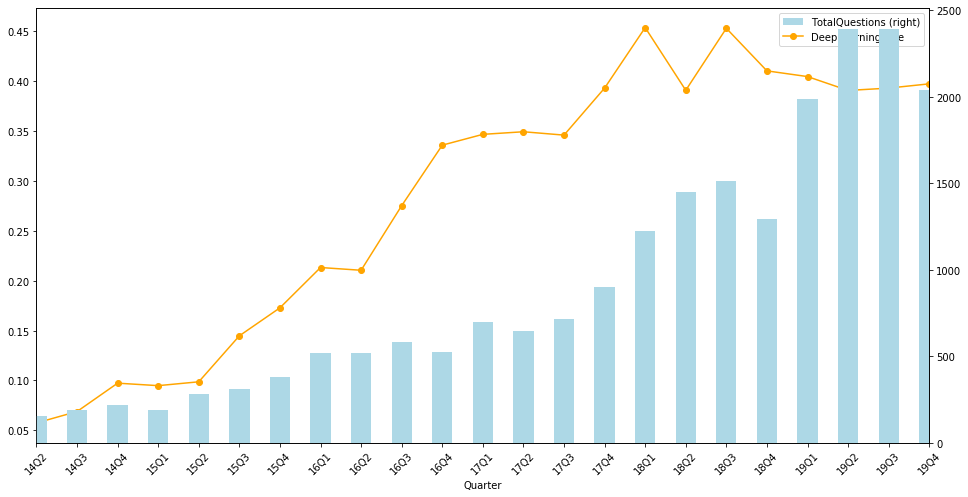

In [28]:
fig, ax = plt.subplots(figsize = (16,8))

ax1 = summary.plot(kind = 'bar', y = 'TotalQuestions', rot = 45,
                   x = 'Quarter', ax=ax, secondary_y = True, color = 'lightblue')
ax2 = summary.plot(kind = 'line', y = 'DeepLearningRate', rot = 45,
                   x = 'Quarter', ax=ax, color = 'orange', marker="o")
